In [4]:
import nltk
import re
import pandas as pd
import numpy as np
import random

pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('../data/SMSSpamCollection.tsv', sep= '\t')
messages.columns = ["labels", "text"]

messages.head()

,labels,text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [5]:
import string


In [6]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

messages['text_clean'] = messages['text'].apply(lambda x: remove_punct(x))

messages.head()

,labels,text,text_clean
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
1,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...


In [7]:
import re 

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens


messages['text_tokenized'] = messages['text_clean'].apply(lambda x: tokenize(x.lower()))

messages.head()

,labels,text,text_clean,text_tokenized
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
1,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[as, per, your, request, melle, melle, oru, minnaminunginte, nurungu, vettam, has, been, set, as..."


In [8]:
stopwords = nltk.corpus.stopwords.words('english')
 

In [9]:
def remove_stopwords(tokenized_text):
    text = [word for word in tokenized_text if word not in stopwords]
    return text

messages['text_nostop'] = messages['text_tokenized'].apply(lambda x: remove_stopwords(x))

messages.head()

,labels,text,text_clean,text_tokenized,text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[as, per, your, request, melle, melle, oru, minnaminunginte, nurungu, vettam, has, been, set, as...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


In [10]:
 def clean_text(text):
     text = "".join([word.lower() for word in text if word not in string.punctuation])
     tokens = re.split('\W+', text)
     text = [word for word in tokens if word not in stopwords]
     return text

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfid_vect.fit_transform(messages['text'])
print(X_tfidf.shape)
print(tfid_vect.get_feature_names())

mear', 'smell', 'smells', 'smeone', 'smidgin', 'smile', 'smiled', 'smiles', 'smiley', 'smiling', 'smith', 'smithswitch', 'smoke', 'smoked', 'smokes', 'smokin', 'smoking', 'smoothly', 'sms', 'sms08718727870', 'smsd', 'smsing', 'smsservices', 'smsshsexnetun', 'smth', 'sn', 'snake', 'snap', 'snappy', 'snatch', 'snd', 'sneham', 'snickering', 'sno', 'snogs', 'snoringthey', 'snow', 'snowball', 'snowboarding', 'snowman', 'snuggles', 'soany', 'soc', 'sochte', 'social', 'sofa', 'soft', 'software', 'soil', 'soiree', 'sol', 'soladha', 'sold', 'solihull', 'solve', 'solved', 'some1', 'somebody', 'someday', 'someone', 'someones', 'someonethat', 'someonone', 'someplace', 'somerset', 'somethin', 'something', 'somethings', 'sometime', 'sometimerakheshvisitor', 'sometimes', 'sometme', 'somewhat', 'somewhere', 'somewheresomeone', 'somewhr', 'somone', 'somtimes', 'sonathaya', 'sonetimes', 'song', 'songs', 'sonot', 'sony', 'sonyericsson', 'soo', 'soon', 'soonc', 'sooner', 'soonlots', 'soonxxx', 'sooo', 'so

In [12]:
X_features = pd.DataFrame(X_tfidf.toarray())

In [13]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_features, messages['labels'], test_size = .2)

In [15]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [16]:
y_pred = rf_model.predict(X_test)


In [17]:
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall, 3)))

Precision: 1.0 / Recall: 0.781


In [18]:
!pip install -U gensim

Requirement already up-to-date: gensim in /home/mishkasistrunk/anaconda3/lib/python3.8/site-packages (3.8.3)
You should consider upgrading via the '/home/mishkasistrunk/anaconda3/bin/python -m pip install --upgrade pip' command.


In [19]:
import gensim
import gensim.downloader as api

wiki_embeddings = api.load('glove-wiki-gigaword-100')

In [20]:
wiki_embeddings['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [21]:
wiki_embeddings.most_similar('king')


[('prince', 0.7682329416275024),
 ('queen', 0.7507690191268921),
 ('son', 0.7020887136459351),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919990181922913),
 ('kingdom', 0.6811410188674927),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712857484817505),
 ('ii', 0.6676074266433716)]

In [22]:
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
messages.head()

,labels,text,text_clean,text_tokenized,text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive,...","[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, don, think, he, goes, to, usf, he, lives, around, here, though]","[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[have, date, on, sunday, with, will]","[i, have, a, date, on, sunday, with, will]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[as, per, your, request, melle, melle, oru, minnaminunginte, nurungu, vettam, has, been, set, as...","[as, per, your, request, melle, melle, oru, minnaminunginte, nurungu, vettam, has, been, set, as...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


In [23]:
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'], messages['labels'], test_size = .2)

In [24]:
w2v_model = gensim.models.Word2Vec(X_train,
                                size = 100,
                                window = 5,
                                min_count=2)

In [25]:
w2v_model.wv['king']

array([ 0.04179109, -0.06625456, -0.00875324,  0.04720961,  0.05936642,
       -0.06109337, -0.02036143, -0.10141282, -0.05502329,  0.01976248,
       -0.16358961, -0.01393895,  0.01423794, -0.04472702, -0.01218794,
       -0.05120958,  0.05660946, -0.028516  ,  0.01312983, -0.00460023,
        0.07452691,  0.02474933,  0.00803914,  0.02586818,  0.03714117,
       -0.0608278 ,  0.07107555,  0.1431186 ,  0.08923581,  0.03390756,
        0.01612614, -0.0595114 , -0.15420865, -0.03427055, -0.01534409,
       -0.00921916,  0.00101165, -0.00124772,  0.03131299, -0.07417276,
       -0.0205239 ,  0.01998809, -0.01258958,  0.02478971, -0.03521717,
        0.05645428, -0.07094227,  0.00332864, -0.0428077 ,  0.05406312,
        0.09192654,  0.07568735, -0.05691652,  0.00312649,  0.00302435,
       -0.0655371 ,  0.09191103,  0.00333941, -0.03741649, -0.03334361,
        0.02424935,  0.05829904, -0.07931694,  0.10905949, -0.01270769,
        0.00420922,  0.02484221,  0.08562702, -0.04389806, -0.00

In [26]:
w2v_model.wv.most_similar('king')

[('give', 0.9986782073974609),
 ('being', 0.998668372631073),
 ('play', 0.9986416101455688),
 ('oh', 0.9986416101455688),
 ('wanted', 0.9986411929130554),
 ('hard', 0.9986289143562317),
 ('left', 0.998626708984375),
 ('wanna', 0.9986266493797302),
 ('dont', 0.9986146688461304),
 ('after', 0.9986134767532349)]

In [27]:
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word]) for ls in X_test])

In [28]:
for i, v in enumerate(w2v_vect):
    print(len(X_test.iloc[i]), len(v))

15 10
16 16
8 8
19 14
17 16
5 3
20 19
4 4
15 15
38 33
25 24
7 7
13 12
7 5
7 5
15 14
18 17
8 8
21 21
12 12
7 7
6 6
10 10
25 24
9 9
7 6
6 6
12 11
4 4
10 9
8 8
22 18
13 13
5 5
6 6
14 11
10 10
9 8
7 7
8 5
2 2
9 9
13 12
12 12
21 20
10 8
2 2
9 8
9 8
25 12
152 141
4 2
25 25
19 16
19 19
7 5
22 20
11 10
5 5
22 20
52 52
17 17
18 16
7 7
5 5
15 14
6 6
14 12
11 9
9 9
5 5
5 3
26 23
5 5
2 2
22 22
25 25
20 13
24 22
16 16
8 4
11 10
6 5
19 19
7 7
25 25
3 1
15 13
28 24
23 17
4 4
23 23
10 10
4 4
31 29
22 17
6 5
10 10
23 23
27 27
22 19
16 15
25 24
7 7
30 30
18 17
9 9
3 3
18 12
5 4
12 12
15 14
8 8
5 5
12 10
6 5
6 5
16 16
7 7
3 3
30 26
21 21
26 25
7 5
9 9
15 15
4 4
25 24
6 5
6 5
6 3
14 11
10 10
11 9
16 15
7 7
9 8
22 22
5 5
29 29
17 17
29 29
29 28
22 22
26 24
11 9
24 21
7 7
7 4
17 16
5 5
70 66
27 25
26 17
25 24
12 12
6 6
13 13
7 7
29 23
23 21
4 4
23 22
6 5
10 10
8 8
2 2
12 10
23 23
8 8
12 11
16 15
32 31
15 14
17 17
21 19
8 7
4 3
9 6
15 12
12 12
101 101
5 5
9 7
23 19
29 29
22 18
13 12
11 11
3 3
24 22
4 4
16 12

In [29]:
w2v_vect_avg = []

#returns word vector averages across each post
for vect in w2v_vect:
    if len(vect)!= 0:
        w2v_vect_avg.append(vect.mean(axis=0))
    else:
            w2v_vect_avg.append(np.zeros(100))

In [30]:
for i, v in enumerate(w2v_vect_avg):
    print(len(X_test.iloc[i]), len(v))

15 100
16 100
8 100
19 100
17 100
5 100
20 100
4 100
15 100
38 100
25 100
7 100
13 100
7 100
7 100
15 100
18 100
8 100
21 100
12 100
7 100
6 100
10 100
25 100
9 100
7 100
6 100
12 100
4 100
10 100
8 100
22 100
13 100
5 100
6 100
14 100
10 100
9 100
7 100
8 100
2 100
9 100
13 100
12 100
21 100
10 100
2 100
9 100
9 100
25 100
152 100
4 100
25 100
19 100
19 100
7 100
22 100
11 100
5 100
22 100
52 100
17 100
18 100
7 100
5 100
15 100
6 100
14 100
11 100
9 100
5 100
5 100
26 100
5 100
2 100
22 100
25 100
20 100
24 100
16 100
8 100
11 100
6 100
19 100
7 100
25 100
3 100
15 100
28 100
23 100
4 100
23 100
10 100
4 100
31 100
22 100
6 100
10 100
23 100
27 100
22 100
16 100
25 100
7 100
30 100
18 100
9 100
3 100
18 100
5 100
12 100
15 100
8 100
5 100
12 100
6 100
6 100
16 100
7 100
3 100
30 100
21 100
26 100
7 100
9 100
15 100
4 100
25 100
6 100
6 100
6 100
14 100
10 100
11 100
16 100
7 100
9 100
22 100
5 100
29 100
17 100
29 100
29 100
22 100
26 100
11 100
24 100
7 100
7 100
17 100
5 100
70 100

In [31]:
messages = pd.read_csv('../data/spam.csv', encoding='latin-1')

messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label', 'text']

labels = np.where(messages['label'] == 'spam', 1, 0)

messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'], labels, test_size = .2)


In [32]:
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

In [33]:
tagged_docs[0]

TaggedDocument(words=['û_', 'we', 'stayin', 'here', 'an', 'extra', 'week', 'back', 'next', 'wed', 'how', 'did', 'we', 'do', 'in', 'the', 'rugby', 'this', 'weekend', 'hi', 'to', 'and', 'and', 'soon', 'ham'], tags=[0])

In [34]:
d2v_model = gensim.models.Doc2Vec(tagged_docs, vector_size = 100, window = 5, min_count = 2)

In [35]:
d2v_model.infer_vector(['i', 'am', 'fucking', 'gay'])

array([ 7.81507697e-03, -1.13970432e-02,  4.96544270e-03,  5.16304653e-03,
        6.65926980e-03, -4.56155307e-04, -2.88532744e-03, -1.91816501e-02,
       -4.86341352e-03,  6.70215767e-03, -2.09937971e-02,  3.65028181e-03,
        4.78195306e-03, -4.97945759e-04, -1.05422484e-02, -8.98107793e-03,
        1.08989021e-02, -1.51150324e-03, -6.06528251e-04, -5.56465983e-03,
        1.08813662e-02,  6.88627921e-03, -5.47186565e-03,  3.09725944e-03,
        4.32756077e-03, -1.77505594e-02,  1.40279839e-02,  3.38602215e-02,
        9.92372911e-03,  5.44282328e-03, -3.72492708e-03,  3.17798622e-05,
       -2.46165525e-02, -1.17646735e-02, -3.51280859e-03, -5.94238658e-03,
       -1.06398802e-05, -4.15686471e-03,  8.82844161e-03, -2.23524403e-02,
        4.96841548e-03,  5.56239765e-03, -5.72413951e-03,  1.01348748e-02,
       -6.39424287e-03,  1.72147732e-02, -1.06247989e-02, -2.12260662e-03,
       -6.88358769e-03,  1.14302803e-02,  1.30712064e-02,  2.20451988e-02,
       -2.08762623e-02,  

In [36]:
labels = np.where(messages['label'] == 'spam', 1, 0)

In [37]:
!pip install -U Keras

Requirement already up-to-date: Keras in /home/mishkasistrunk/anaconda3/lib/python3.8/site-packages (2.4.3)
You should consider upgrading via the '/home/mishkasistrunk/anaconda3/bin/python -m pip install --upgrade pip' command.


In [38]:
!pip install -U tensorflow

     |████████████████████████████████| 394.4 MB 51 kB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0
You should consider upgrading via the '/home/mishkasistrunk/anaconda3/bin/python -m pip install --upgrade pip' command.


In [39]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [41]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [42]:
X_test_seq[0]

[386, 752, 54, 37, 26, 1, 66, 7, 2, 58, 222]

In [43]:
import keras.backend as K 
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

import tensorflow as tf


In [44]:
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)






In [45]:
print("Shape of X train is " + str(X_train_seq_padded.shape))

print('Shape of X test is ' + str(X_test_seq_padded.shape))

print('Shape of Y train is ' + str(y_train.shape))

print('Shape of Y test is ' + str(y_test.shape))

print('Type of X train is ' + str(type(X_train_seq_padded)))

print('Type of X test is ' + str(type(X_test_seq_padded)))

print('Type of Y train is ' + str(type(y_train)))

print('Type of Y test is ' + str(type(y_test)))





Shape of X train is (4457, 50)
Shape of X test is (1115, 50)
Shape of Y train is (4457,)
Shape of Y test is (1115,)
Type of X train is <class 'numpy.ndarray'>
Type of X test is <class 'numpy.ndarray'>
Type of Y train is <class 'numpy.ndarray'>
Type of Y test is <class 'numpy.ndarray'>


In [46]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip)(y_true * y_pred, 0 , 1))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision



In [47]:
model = Sequential()

#Embedding/vector for each text message 
#what are the dimensions of the input?
model.add(Embedding(len(tokenizer.index_word)+1, 32))
#Prevents overfitting through regulazation
model.add(LSTM(32, dropout = 0, recurrent_dropout = 0))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          221824    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 231,233
Trainable params: 231,233
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics = ['accuracy'])

In [49]:
history = model.fit(X_train_seq_padded, y_train, batch_size=32, epochs=10, validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 4s 17ms/step - loss: 0.4462 - accuracy: 0.8423 - val_loss: 0.0668 - val_accuracy: 0.9776
Epoch 2/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0418 - accuracy: 0.9880 - val_loss: 0.0428 - val_accuracy: 0.9883
Epoch 3/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0255 - accuracy: 0.9946 - val_loss: 0.0432 - val_accuracy: 0.9919
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0430 - val_accuracy: 0.9892
Epoch 5/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0475 - val_accuracy: 0.9901
Epoch 6/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0475 - val_accuracy: 0.9874
Epoch 7/10
140/140 [==============================] - 2s 15ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0635 - val_accuracy: 0.9874

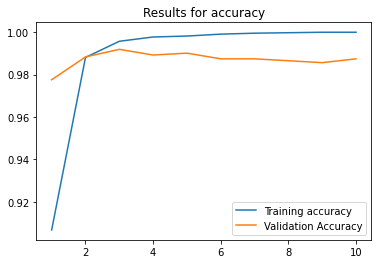

In [50]:
import matplotlib.pyplot as plt

for i in ['accuracy']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label = 'Training accuracy')
    plt.plot(epochs, val_acc, label = 'Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

In [51]:
X_train[:]

2791    [û_, we, stayin, here, an, extra, week, back, next, wed, how, did, we, do, in, the, rugby, this,...
5303                             [can, but, it, will, tell, quite, long, cos, haven, finish, my, film, yet]
2553                                                            [ìï, give, me, some, time, to, walk, there]
5207    [babe, answering, you, can, you, see, me, maybe, you, better, reboot, ym, got, the, photo, it, g...
4542                                                   [ve, been, trying, to, reach, him, without, success]
                                                       ...                                                 
2508                                                                                                   [ok]
4137    [good, no, don, need, any, receipts, ûówell, done, û_, yes, please, tell, what, her, number, cou...
1986                                                                             [antha, num, corrct, dane]
1725                        

In [52]:
y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [54]:
X_train.head()



,clean_text
0,"['living', 'simple', 'loving', 'also', 'simple', 'laughing', 'simple', 'winning', 'tooo', 'simpl..."
1,"['already', 'squatting', 'new', 'way', 'walking']"
2,"['sister', 'got', 'placed', 'birla', 'soft', 'da']"
3,"['lovely', 'smell', 'bus', 'aint', 'tobacco', '']"
4,"['yes', 'nigh', 'cant', 'aha']"


In [60]:
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'], messages['label'], test_size = .2)

tfid_vect.fit(X_train)
tfid_vect.fit(X_test)
X_train_vect = tfid_vect.transform(X_train)
X_test_vect = tfid_vect.transform(X_test)


In [61]:
X_test_vect[0].toarray()

print("Shape of X train is " + str(X_train_vect.shape))

print('Shape of X test is ' + str(X_test_vect.shape))

print('Shape of Y train is ' + str(y_train.shape))

print('Shape of Y test is ' + str(y_test.shape))

Shape of X train is (4457, 1082)
Shape of X test is (1115, 1082)
Shape of Y train is (4457,)
Shape of Y test is (1115,)


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect, y_train.values.ravel())

y_test[:]

3892     ham
1361     ham
3373     ham
766      ham
5189    spam
        ... 
3703     ham
2029     ham
312      ham
2750     ham
2019     ham
Name: label, Length: 1115, dtype: object

In [63]:
y_pred = rf_model.predict(X_test_vect)

In [64]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(y_pred == y_test['label']).sum()/len(y_pred), 3))

ValueError: pos_label=1 is not a valid label: array(['ham', 'spam'], dtype='<U4')